<a href="https://colab.research.google.com/github/dingjun6953/Accelerate-Python-codes-using-proper-libraries/blob/main/pyspark_ml_dingjun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('Pyspark_Dingjun').getOrCreate()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=eac4cb56976f9014d1e1223433281806b2dcba6b2fb72394c749e9da73679bf1
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [ ]:
# The applied options are for CSV files. For other file types, these will be ignored.
df =spark.read.csv('tips.csv',header=True,inferSchema=True)
df.show()

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|
|     18.43| 3.0|  Male|    No|Sun|Dinner|   4|
|     14.83|3.02|Female|    No|Sun|Dinner|   2|
|     21.58|3.92|  Male|    No|Sun|Dinner|   2|
|     10.33|1.67|Female|    No|Sun|Dinner|   3|
|     16.29|3.71|  Male|    No|Sun|Dinne

In [ ]:
df.printSchema()

root
 |-- total_bill: double (nullable = true)
 |-- tip: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [ ]:
df.columns

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [ ]:
### Handling Categorical Features
from pyspark.ml.feature import StringIndexer

In [ ]:
df.show()

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|
|     18.43| 3.0|  Male|    No|Sun|Dinner|   4|
|     14.83|3.02|Female|    No|Sun|Dinner|   2|
|     21.58|3.92|  Male|    No|Sun|Dinner|   2|
|     10.33|1.67|Female|    No|Sun|Dinner|   3|
|     16.29|3.71|  Male|    No|Sun|Dinne

In [ ]:
indexer=StringIndexer(inputCol="sex",outputCol="sex_indexed")
df_rdd=indexer.fit(df).transform(df)
df_rdd.show()

+----------+----+------+------+---+------+----+-----------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|
+----------+----+------+------+---+------+----+-----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|        0.0|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|        0.0|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|        0.0|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|        0.0|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|        0.0|
|     10.27|1.71|  Male|    No|Sun|Dinner|   2|        0.0|
|     35.26| 5.0|Female|    No|Sun|Dinner|   4|        1.0|
|     15.42|1.57|  Male|    No|Sun|Dinner|   2|        0.0|
|     18.43| 3.0|  Male|    No|Sun|Dinne

In [ ]:
indexer=StringIndexer(inputCols=["smoker","day","time"],outputCols=["smoker_indexed","day_indexed",
                                                                  "time_index"])
df_rdd=indexer.fit(df_rdd).transform(df_rdd)
df_rdd.show()

+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|smoker_indexed|day_indexed|time_index|
+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|           0.0|        1.0|       0.0|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|        1.0|           0.0|        1.0|       0.0|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|        0.0|           0.0|        1.0|       0.0|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|
|     26.88|3.12|  M

In [ ]:
df_rdd.columns

['total_bill',
 'tip',
 'sex',
 'smoker',
 'day',
 'time',
 'size',
 'sex_indexed',
 'smoker_indexed',
 'day_indexed',
 'time_index']

In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['tip','size','sex_indexed','smoker_indexed','day_indexed',
                          'time_index'],outputCol="Independent Features")
output=featureassembler.transform(df_rdd)

featureassembler=VectorAssembler(inputCols=['Independent Features'],outputCol='features')
output=featureassembler.transform(output)

In [ ]:
output.show()

+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+--------------------+--------------------+
|total_bill| tip|   sex|smoker|day|  time|size|sex_indexed|smoker_indexed|day_indexed|time_index|Independent Features|            features|
+----------+----+------+------+---+------+----+-----------+--------------+-----------+----------+--------------------+--------------------+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|        1.0|           0.0|        1.0|       0.0|[1.01,2.0,1.0,0.0...|[1.01,2.0,1.0,0.0...|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|[1.66,3.0,0.0,0.0...|[1.66,3.0,0.0,0.0...|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|        0.0|           0.0|        1.0|       0.0|[3.5,3.0,0.0,0.0,...|[3.5,3.0,0.0,0.0,...|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|        0.0|           0.0|        1.0|       0.0|[3.31,2.0,0.0,0.0...|[3.31,2.0,0.0,0.0...|
|     24.59|3.61|Fem

In [ ]:
finalized_data=output.select("Independent Features","total_bill")

In [ ]:
finalized_data.show()

+--------------------+----------+
|Independent Features|total_bill|
+--------------------+----------+
|[1.01,2.0,1.0,0.0...|     16.99|
|[1.66,3.0,0.0,0.0...|     10.34|
|[3.5,3.0,0.0,0.0,...|     21.01|
|[3.31,2.0,0.0,0.0...|     23.68|
|[3.61,4.0,1.0,0.0...|     24.59|
|[4.71,4.0,0.0,0.0...|     25.29|
|[2.0,2.0,0.0,0.0,...|      8.77|
|[3.12,4.0,0.0,0.0...|     26.88|
|[1.96,2.0,0.0,0.0...|     15.04|
|[3.23,2.0,0.0,0.0...|     14.78|
|[1.71,2.0,0.0,0.0...|     10.27|
|[5.0,4.0,1.0,0.0,...|     35.26|
|[1.57,2.0,0.0,0.0...|     15.42|
|[3.0,4.0,0.0,0.0,...|     18.43|
|[3.02,2.0,1.0,0.0...|     14.83|
|[3.92,2.0,0.0,0.0...|     21.58|
|[1.67,3.0,1.0,0.0...|     10.33|
|[3.71,3.0,0.0,0.0...|     16.29|
|[3.5,3.0,1.0,0.0,...|     16.97|
|(6,[0,1],[3.35,3.0])|     20.65|
+--------------------+----------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent Features', labelCol='total_bill')
regressor=regressor.fit(train_data)

In [ ]:
regressor.coefficients

DenseVector([3.2181, 3.2248, -0.4961, 1.8865, -0.244, -1.1759])

In [ ]:
regressor.intercept

1.648681900876396

In [ ]:
### Predictions
pred_results=regressor.evaluate(test_data)

In [ ]:
## Final comparison
pred_results.predictions.show()

+--------------------+----------+------------------+
|Independent Features|total_bill|        prediction|
+--------------------+----------+------------------+
| (6,[0,1],[2.0,2.0])|     13.37|14.534503009226315|
| (6,[0,1],[2.5,4.0])|     18.35|22.593110650721353|
|(6,[0,1],[2.64,3.0])|     17.59|19.818882331356107|
| (6,[0,1],[3.0,2.0])|      14.0|17.752645320462904|
|(6,[0,1],[3.27,2.0])|     17.78|18.621543744496783|
|(6,[0,1],[3.76,2.0])|     18.24|20.198433477002713|
|(6,[0,1],[7.58,4.0])|     39.42|38.941273591803224|
|[1.0,1.0,1.0,0.0,...|      7.25| 7.595488061915685|
|[1.0,1.0,1.0,1.0,...|      3.07| 9.481966915945952|
|[1.01,2.0,1.0,0.0...|     16.99|10.608422660317943|
|[1.17,2.0,0.0,1.0...|     32.83|13.749923744930214|
|[1.25,2.0,1.0,0.0...|      8.51| 9.960841798515348|
|[1.5,2.0,0.0,0.0,...|     19.08|11.261481769460167|
|[1.5,2.0,0.0,1.0,...|     15.69|14.567895639989809|
|[1.5,2.0,0.0,1.0,...|     12.03|14.079865504692853|
|[1.5,2.0,1.0,0.0,...|     10.65|10.7653773763

In [ ]:
### PErformance Metrics
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.5840725454567579, 3.975118561705597, 35.047034705345595)

To Apply Generalized Linear Regression 


In [ ]:
finalized_data=output.select("features","total_bill")

In [ ]:
finalized_data.show()

+--------------------+----------+
|            features|total_bill|
+--------------------+----------+
|[1.01,2.0,1.0,0.0...|     16.99|
|[1.66,3.0,0.0,0.0...|     10.34|
|[3.5,3.0,0.0,0.0,...|     21.01|
|[3.31,2.0,0.0,0.0...|     23.68|
|[3.61,4.0,1.0,0.0...|     24.59|
|[4.71,4.0,0.0,0.0...|     25.29|
|[2.0,2.0,0.0,0.0,...|      8.77|
|[3.12,4.0,0.0,0.0...|     26.88|
|[1.96,2.0,0.0,0.0...|     15.04|
|[3.23,2.0,0.0,0.0...|     14.78|
|[1.71,2.0,0.0,0.0...|     10.27|
|[5.0,4.0,1.0,0.0,...|     35.26|
|[1.57,2.0,0.0,0.0...|     15.42|
|[3.0,4.0,0.0,0.0,...|     18.43|
|[3.02,2.0,1.0,0.0...|     14.83|
|[3.92,2.0,0.0,0.0...|     21.58|
|[1.67,3.0,1.0,0.0...|     10.33|
|[3.71,3.0,0.0,0.0...|     16.29|
|[3.5,3.0,1.0,0.0,...|     16.97|
|(6,[0,1],[3.35,3.0])|     20.65|
+--------------------+----------+
only showing top 20 rows



In [ ]:
glr = GeneralizedLinearRegression(labelCol="total_bill",family="gaussian", link="identity", maxIter=10, regParam=0.3)

In [ ]:
(train, test) = finalized_data.randomSplit([0.75, 0.25])

In [ ]:
model = glr.fit(train)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
tdata = model.transform(test)
tdata.show(3)

rmse = RegressionEvaluator(labelCol="total_bill", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(tdata)
mae = RegressionEvaluator(labelCol="total_bill", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(tdata)
r2 = RegressionEvaluator(labelCol="total_bill", predictionCol="prediction", metricName="r2")
r2 = r2.evaluate(tdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

+--------------------+----------+------------------+
|            features|total_bill|        prediction|
+--------------------+----------+------------------+
|(6,[0,1],[1.25,2.0])|     10.51| 11.89380191599285|
|(6,[0,1],[1.47,2.0])|     10.77|12.635966878273848|
| (6,[0,1],[2.0,2.0])|     12.69|14.423909741950794|
+--------------------+----------+------------------+
only showing top 3 rows

RMSE:  7.802741442417535
MAE:  5.51171479161189
R-squared:  0.38542376890215957


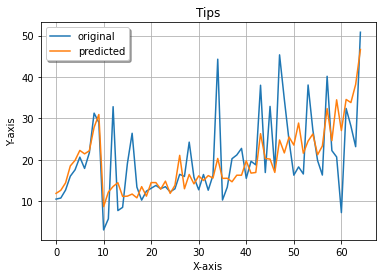

In [ ]:
import matplotlib.pyplot as plt

x_ax = range(0, tdata.count())
y_pred=tdata.select("prediction").collect()
y_orig=tdata.select("total_bill").collect()
 
plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Tips")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

*** check some CSV files 

In [ ]:
df_health =spark.read.csv('BenefitsCostSharing.csv',header=True,inferSchema=True)
df_health.show()

+--------------------+------------+-------------+-------------+-------------+-------------+-------------+-------------+--------------------+----------+--------------------+-------------------+---------+-----+-----------------+-----------------+--------------+----------------+----------------+--------+---------+--------+--------------------+-----------+-----------------+---------------+---------+----------+-------------------+---------+----------+----------+
|         BenefitName|BusinessYear|CoinsInnTier1|CoinsInnTier2|CoinsOutofNet|CopayInnTier1|CopayInnTier2|CopayOutofNet|        EHBVarReason|Exclusions|         Explanation|         ImportDate|IsCovered|IsEHB|IsExclFromInnMOOP|IsExclFromOonMOOP|IsStateMandate|IsSubjToDedTier1|IsSubjToDedTier2|IssuerId|IssuerId2|LimitQty|           LimitUnit|MinimumStay|           PlanId|QuantLimitOnSvc|RowNumber|SourceName|StandardComponentId|StateCode|StateCode2|VersionNum|
+--------------------+------------+-------------+-------------+-------------

In [ ]:
df_health.printSchema()

root
 |-- BenefitName: string (nullable = true)
 |-- BusinessYear: integer (nullable = true)
 |-- CoinsInnTier1: string (nullable = true)
 |-- CoinsInnTier2: string (nullable = true)
 |-- CoinsOutofNet: string (nullable = true)
 |-- CopayInnTier1: string (nullable = true)
 |-- CopayInnTier2: string (nullable = true)
 |-- CopayOutofNet: string (nullable = true)
 |-- EHBVarReason: string (nullable = true)
 |-- Exclusions: string (nullable = true)
 |-- Explanation: string (nullable = true)
 |-- ImportDate: string (nullable = true)
 |-- IsCovered: string (nullable = true)
 |-- IsEHB: string (nullable = true)
 |-- IsExclFromInnMOOP: string (nullable = true)
 |-- IsExclFromOonMOOP: string (nullable = true)
 |-- IsStateMandate: string (nullable = true)
 |-- IsSubjToDedTier1: string (nullable = true)
 |-- IsSubjToDedTier2: string (nullable = true)
 |-- IssuerId: string (nullable = true)
 |-- IssuerId2: string (nullable = true)
 |-- LimitQty: double (nullable = true)
 |-- LimitUnit: string (nul

In [ ]:
df_health.count()

263211

In [ ]:
df_salary =spark.read.csv('Salaries.csv',header=True,inferSchema=True)
df_salary.show()

+----+------------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|  Id|      EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+----+------------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| 1.0|    NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
| 2.0|      GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
| 3.0|    ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Francisco|  null|
| 4.0| CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916.0|   56120.71| 198306.9|    null|332343.61|       332343.61|2011

In [ ]:
df_salary.count()

190178

In [ ]:
df_salary.printSchema()

root
 |-- Id: double (nullable = true)
 |-- EmployeeName: string (nullable = true)
 |-- JobTitle: string (nullable = true)
 |-- BasePay: string (nullable = true)
 |-- OvertimePay: string (nullable = true)
 |-- OtherPay: string (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- TotalPay: string (nullable = true)
 |-- TotalPayBenefits: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Status: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType
df_salary = df_salary.withColumn("BasePay", df_salary["BasePay"].cast(IntegerType()))
df_salary = df_salary.withColumn("OvertimePay", df_salary["OvertimePay"].cast(IntegerType()))
df_salary = df_salary.withColumn("OtherPay", df_salary["OtherPay"].cast(IntegerType()))
df_salary = df_salary.withColumn("TotalPay", df_salary["TotalPay"].cast(IntegerType()))



In [ ]:
df_salary.printSchema()

root
 |-- Id: double (nullable = true)
 |-- EmployeeName: string (nullable = true)
 |-- JobTitle: string (nullable = true)
 |-- BasePay: integer (nullable = true)
 |-- OvertimePay: integer (nullable = true)
 |-- OtherPay: integer (nullable = true)
 |-- Benefits: string (nullable = true)
 |-- TotalPay: integer (nullable = true)
 |-- TotalPayBenefits: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Status: string (nullable = true)



In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['BasePay','OvertimePay','OtherPay'],outputCol="Independent Features")
output=featureassembler.transform(df_salary)

In [ ]:
df_salary.show()

+----+------------------+--------------------+-------+-----------+--------+--------+--------+----------------+----+-----+-------------+------+
|  Id|      EmployeeName|            JobTitle|BasePay|OvertimePay|OtherPay|Benefits|TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+----+------------------+--------------------+-------+-----------+--------+--------+--------+----------------+----+-----+-------------+------+
| 1.0|    NATHANIEL FORD|GENERAL MANAGER-M...| 167411|          0|  400184|    null|  567595|       567595.43|2011| null|San Francisco|  null|
| 2.0|      GARY JIMENEZ|CAPTAIN III (POLI...| 155966|     245131|  137811|    null|  538909|       538909.28|2011| null|San Francisco|  null|
| 3.0|    ALBERT PARDINI|CAPTAIN III (POLI...| 212739|     106088|   16452|    null|  335279|       335279.91|2011| null|San Francisco|  null|
| 4.0| CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916|      56120|  198306|    null|  332343|       332343.61|2011| null|San Francisco|  null|

In [ ]:
output.show()

+----+------------------+--------------------+-------+-----------+--------+--------+--------+----------------+----+-----+-------------+------+--------------------+
|  Id|      EmployeeName|            JobTitle|BasePay|OvertimePay|OtherPay|Benefits|TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|Independent Features|
+----+------------------+--------------------+-------+-----------+--------+--------+--------+----------------+----+-----+-------------+------+--------------------+
| 1.0|    NATHANIEL FORD|GENERAL MANAGER-M...| 167411|          0|  400184|    null|  567595|       567595.43|2011| null|San Francisco|  null|[167411.0,0.0,400...|
| 2.0|      GARY JIMENEZ|CAPTAIN III (POLI...| 155966|     245131|  137811|    null|  538909|       538909.28|2011| null|San Francisco|  null|[155966.0,245131....|
| 3.0|    ALBERT PARDINI|CAPTAIN III (POLI...| 212739|     106088|   16452|    null|  335279|       335279.91|2011| null|San Francisco|  null|[212739.0,106088....|
| 4.0| CHRISTOPH

In [ ]:
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
|[167411.0,0.0,400...|
|[155966.0,245131....|
|[212739.0,106088....|
|[77916.0,56120.0,...|
|[134401.0,9737.0,...|
|[118602.0,8601.0,...|
|[92492.0,89062.0,...|
|[256576.0,0.0,513...|
|[176932.0,86362.0...|
|[285262.0,0.0,171...|
|[194999.0,71344.0...|
|[99722.0,87082.0,...|
|  [294580.0,0.0,0.0]|
|[271329.0,0.0,213...|
|[174872.0,74050.0...|
|[198778.0,73478.0...|
|[268604.0,0.0,161...|
|[140546.0,119397....|
|[168692.0,69626.0...|
|[257510.0,880.0,1...|
+--------------------+
only showing top 20 rows



In [ ]:
finalized_data=output.select("Independent Features","TotalPay")

In [ ]:
finalized_data.show()

+--------------------+--------+
|Independent Features|TotalPay|
+--------------------+--------+
|[167411.0,0.0,400...|  567595|
|[155966.0,245131....|  538909|
|[212739.0,106088....|  335279|
|[77916.0,56120.0,...|  332343|
|[134401.0,9737.0,...|  326373|
|[118602.0,8601.0,...|  316285|
|[92492.0,89062.0,...|  315981|
|[256576.0,0.0,513...|  307899|
|[176932.0,86362.0...|  303427|
|[285262.0,0.0,171...|  302377|
|[194999.0,71344.0...|  299494|
|[99722.0,87082.0,...|  297608|
|  [294580.0,0.0,0.0]|  294580|
|[271329.0,0.0,213...|  292671|
|[174872.0,74050.0...|  286347|
|[198778.0,73478.0...|  286213|
|[268604.0,0.0,161...|  284720|
|[140546.0,119397....|  278569|
|[168692.0,69626.0...|  276434|
|[257510.0,880.0,1...|  274550|
+--------------------+--------+
only showing top 20 rows



In [ ]:
finalized_data.count()

190178

In [ ]:
finalized_data=finalized_data.na.drop(how="any")

:******************************************************************************

Data analyses of BitstampUSD csv data file using the following two ML methods:
1. Linear Regression
2. Generalized Linear Regression

In [ ]:
df_bitcoin =spark.read.csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',header=True,inferSchema=True)
df_bitcoin.show()

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325317980| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318040| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318100| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318160| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318220| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318280| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318340| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318400| NaN| NaN| NaN|  NaN|         NaN|              NaN|           NaN|
|1325318460| NaN| NaN| NaN|  NaN|       

In [ ]:
df_bitcoin=df_bitcoin.na.drop(how="any")

In [ ]:
df_bitcoin.show()

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325346600|4.39|4.39|4.39| 4.39|        48.0|           210.72|          4.39|
|1325350740| 4.5|4.57| 4.5| 4.57| 37.86229723|     171.38033753|  4.5264114983|
|1325350800|4.58|4.58|4.58| 4.58|         9.0|            41.22|          4.58|
|1325391360|4.58|4.58|4.58| 4.58|       1.502|          6.87916|          4.58|
|1325431680|4.84|4.84|4.84| 4.84|        10.0|             48.4|          4.84|
|1325457900| 5.0| 5.0| 5.0|  5.0|        10.1|             50.5|           5.0|
|1325534640| 5.0| 5.0| 5.0|  5.0|      19.048|            95.24|           5.0|
|1325591100|5.32|5.32|5.32| 5.32|  2.41917293|     12.869999988|          5.32|
|1325600520|5.14|5.14|5.14| 5.14|       

In [ ]:
df_bitcoin.count()

3613769

In [ ]:
df_bitcoin.printSchema()

root
 |-- Timestamp: integer (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume_(BTC): double (nullable = true)
 |-- Volume_(Currency): double (nullable = true)
 |-- Weighted_Price: double (nullable = true)



In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['Open','High', 'Low','Close','Volume_(BTC)','Volume_(Currency)'],outputCol="Independent Features")
output=featureassembler.transform(df_bitcoin)

In [ ]:
finalized_data=output.select("Independent Features","Weighted_Price")

In [ ]:
finalized_data.show()

+--------------------+--------------+
|Independent Features|Weighted_Price|
+--------------------+--------------+
|[4.39,4.39,4.39,4...|          4.39|
|[4.39,4.39,4.39,4...|          4.39|
|[4.5,4.57,4.5,4.5...|  4.5264114983|
|[4.58,4.58,4.58,4...|          4.58|
|[4.58,4.58,4.58,4...|          4.58|
|[4.84,4.84,4.84,4...|          4.84|
|[5.0,5.0,5.0,5.0,...|           5.0|
|[5.0,5.0,5.0,5.0,...|           5.0|
|[5.32,5.32,5.32,5...|          5.32|
|[5.14,5.14,5.14,5...|          5.14|
|[5.26,5.26,5.26,5...|          5.26|
|[5.29,5.29,5.29,5...|          5.29|
|[5.29,5.29,5.29,5...|          5.29|
|[5.14,5.14,5.14,5...|          5.14|
|[5.29,5.29,5.29,5...|          5.29|
|[5.29,5.29,5.29,5...|          5.29|
|[4.93,4.93,4.93,4...|          4.93|
|[4.93,4.93,4.93,4...|          4.93|
|[5.19,5.19,5.19,5...|          5.19|
|[5.19,5.19,5.19,5...|          5.19|
+--------------------+--------------+
only showing top 20 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
##train test split
train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independent Features', labelCol='Weighted_Price')
regressor=regressor.fit(train_data)

In [ ]:
pred_results=regressor.evaluate(test_data)

In [ ]:
pred_results.predictions.show()

+--------------------+--------------+------------------+
|Independent Features|Weighted_Price|        prediction|
+--------------------+--------------+------------------+
|[4.14,4.14,4.14,4...|          4.14|4.2575178044660404|
|[4.23,4.23,4.23,4...|          4.23| 4.346835248146146|
|[4.3,4.3,4.28,4.2...|        4.2875| 4.412638678340919|
|[4.3,4.3,4.3,4.3,...|           4.3| 4.369528159820228|
|[4.38,4.38,4.38,4...|          4.38| 4.460334671871512|
|[4.4,4.4,4.4,4.4,...|           4.4|  4.50839916390177|
|[4.45,4.45,4.45,4...|          4.45| 4.574501626373279|
|[4.45,4.45,4.45,4...|          4.45| 4.566834930571646|
|[4.45,4.45,4.45,4...|          4.45|4.5585645113708235|
|[4.47,4.47,4.47,4...|          4.47| 4.585573062137789|
|[4.49,4.49,4.49,4...|          4.49|  4.61415325197999|
|[4.49,4.49,4.49,4...|          4.49| 4.606834872830828|
|[4.5,4.65,4.5,4.6...|  4.5341072944| 4.627928156265022|
|[4.51,4.51,4.51,4...|          4.51| 4.634675188803402|
|[4.52,4.52,4.52,4...|         

In [ ]:
### PErformance Metrics
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

(0.9999998056829986, 1.5614665206197333, 15.76613153552983)

The following codes try to Generalized Linear Regression for data analyses

In [ ]:
from pyspark.ml.regression import GeneralizedLinearRegression

# Load training data
dataset = spark.read.csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',header=True,inferSchema=True)
dataset=dataset.na.drop(how="any")



In [ ]:
dataset.show()

+----------+----+----+----+-----+------------+-----------------+--------------+
| Timestamp|Open|High| Low|Close|Volume_(BTC)|Volume_(Currency)|Weighted_Price|
+----------+----+----+----+-----+------------+-----------------+--------------+
|1325317920|4.39|4.39|4.39| 4.39|  0.45558087|     2.0000000193|          4.39|
|1325346600|4.39|4.39|4.39| 4.39|        48.0|           210.72|          4.39|
|1325350740| 4.5|4.57| 4.5| 4.57| 37.86229723|     171.38033753|  4.5264114983|
|1325350800|4.58|4.58|4.58| 4.58|         9.0|            41.22|          4.58|
|1325391360|4.58|4.58|4.58| 4.58|       1.502|          6.87916|          4.58|
|1325431680|4.84|4.84|4.84| 4.84|        10.0|             48.4|          4.84|
|1325457900| 5.0| 5.0| 5.0|  5.0|        10.1|             50.5|           5.0|
|1325534640| 5.0| 5.0| 5.0|  5.0|      19.048|            95.24|           5.0|
|1325591100|5.32|5.32|5.32| 5.32|  2.41917293|     12.869999988|          5.32|
|1325600520|5.14|5.14|5.14| 5.14|       

In [ ]:
from pyspark.ml.feature import VectorAssembler
featureassembler=VectorAssembler(inputCols=['Open','High', 'Low','Close','Volume_(BTC)','Volume_(Currency)'],outputCol="Independent Features")
output=featureassembler.transform(dataset)


featureassembler=VectorAssembler(inputCols=['Independent Features'],outputCol='features')
output=featureassembler.transform(output)

finalized_data=output.select("features","Weighted_Price")




In [ ]:
finalized_data.show()

+--------------------+--------------+
|            features|Weighted_Price|
+--------------------+--------------+
|[4.39,4.39,4.39,4...|          4.39|
|[4.39,4.39,4.39,4...|          4.39|
|[4.5,4.57,4.5,4.5...|  4.5264114983|
|[4.58,4.58,4.58,4...|          4.58|
|[4.58,4.58,4.58,4...|          4.58|
|[4.84,4.84,4.84,4...|          4.84|
|[5.0,5.0,5.0,5.0,...|           5.0|
|[5.0,5.0,5.0,5.0,...|           5.0|
|[5.32,5.32,5.32,5...|          5.32|
|[5.14,5.14,5.14,5...|          5.14|
|[5.26,5.26,5.26,5...|          5.26|
|[5.29,5.29,5.29,5...|          5.29|
|[5.29,5.29,5.29,5...|          5.29|
|[5.14,5.14,5.14,5...|          5.14|
|[5.29,5.29,5.29,5...|          5.29|
|[5.29,5.29,5.29,5...|          5.29|
|[4.93,4.93,4.93,4...|          4.93|
|[4.93,4.93,4.93,4...|          4.93|
|[5.19,5.19,5.19,5...|          5.19|
|[5.19,5.19,5.19,5...|          5.19|
+--------------------+--------------+
only showing top 20 rows



In [ ]:
glr = GeneralizedLinearRegression(labelCol="Weighted_Price",family="gaussian", link="identity", maxIter=10, regParam=0.3)

In [ ]:
(train, test) = finalized_data.randomSplit([0.8, 0.2])

In [ ]:
model = glr.fit(train)

In [ ]:
#glr=GeneralizedLinearRegression(labelCol="Weighted_Price",family="poisson",maxIter=10,regParam=0.3)

#model = glr.fit(train)
 
print("Coefficients: ", model.coefficients)
print("Intercept: ", model.intercept)

Coefficients:  [0.24607406218597186,0.2505788175182226,0.25257503065720416,0.25074729464209694,-0.0013419270648663392,-1.4254431398720666e-06]
Intercept:  0.19225685898229777


In [ ]:
print(model.summary)

Coefficients:
             Feature Estimate Std Error   T Value P Value
         (Intercept)   0.1923    0.0033   57.9030  0.0000
Independent Featu...   0.2461    0.0000 5659.7238  0.0000
Independent Featu...   0.2506    0.0000 5738.7524  0.0000
Independent Featu...   0.2526    0.0000 5783.4471  0.0000
Independent Featu...   0.2507    0.0000 5760.6185  0.0000
Independent Featu...  -0.0013    0.0001  -14.2602  0.0000
Independent Featu...   0.0000    0.0000  -70.0365  0.0000

(Dispersion parameter for gaussian family taken to be 20.2962)
Null deviance: 233766566947205.0600 on 2890651 degrees of freedom
   Residual deviance: 58669239.7991 on 2890651 degrees of freedom
AIC: 16905475.6773


In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
tdata = model.transform(test)
tdata.show(3)

rmse = RegressionEvaluator(labelCol="Weighted_Price", predictionCol="prediction", metricName="rmse")
rmse = rmse.evaluate(tdata)
mae = RegressionEvaluator(labelCol="Weighted_Price", predictionCol="prediction", metricName="mae")
mae = mae.evaluate(tdata)
r2 = RegressionEvaluator(labelCol="Weighted_Price", predictionCol="prediction", metricName="r2")
r2 = r2.evaluate(tdata)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)

+--------------------+--------------+------------------+
|            features|Weighted_Price|        prediction|
+--------------------+--------------+------------------+
|[3.8,3.8,3.8,3.8,...|           3.8|3.9917988551834056|
|[4.3,4.3,4.3,4.3,...|           4.3| 4.480736553719601|
|[4.33,4.33,4.33,4...|          4.33| 4.517363744367934|
+--------------------+--------------+------------------+
only showing top 3 rows

RMSE:  4.4807873583361095
MAE:  1.692349427124173
R-squared:  0.9999997526198995


Compared to results generated by linear regression: (0.9999998056829986, 1.5614665206197333, 15.76613153552983)
Conclusion: in RMSE the GLR is better than the LR

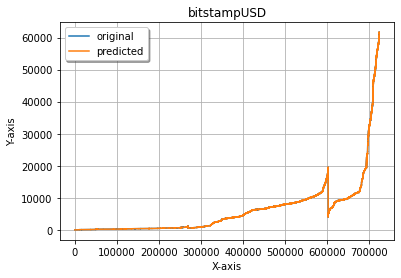

In [ ]:
import matplotlib.pyplot as plt

x_ax = range(0, tdata.count())
y_pred=tdata.select("prediction").collect()
y_orig=tdata.select("Weighted_Price").collect()
 
plt.plot(x_ax, y_orig, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("bitstampUSD")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Conclusion: GLR is better than LR. 